In [1]:
import sys
import datetime
from finplan import CashFlow, NetValue, get_next_month 
import plotnine
import matplotlib as mpl
import matplotlib.pyplot as plt

In [21]:
today = datetime.date.today()
next_month = get_next_month(today)
equity = CashFlow(name="equity", start_date=today, start_value = .55 * 1.8 * 10**6,
                  monthly_growth_rate_mean=1+.05/12.0, monthly_growth_rate_vol=.05)

bonds = CashFlow(name="bonds", start_date=today, start_value=.35 * 1.8 * 10**6,
                 monthly_growth_rate_mean=1+.01/12.0, monthly_growth_rate_vol=.02)

cash = CashFlow(name="cash", start_date=today, start_value=.1 * 1.8 * 10**6,
                 monthly_growth_rate_mean=1+.01/12.0, monthly_growth_rate_vol=.00)

income = CashFlow(name="income", start_date=today, monthly_value=50000,
                  monthly_growth_rate_mean=1+.01/12.0, monthly_growth_rate_vol=0.001)
expenses = CashFlow(name="expenses", start_date=today, monthly_value=50000,
                    monthly_growth_rate_mean=1+.01/12.0, monthly_growth_rate_vol=.01)

ava_college = CashFlow(name="ava_college", start_date=datetime.date(2025, 9, 1), end_date=datetime.date(2028, 6, 1),
                       monthly_value=-50000, monthly_growth_rate_mean=1, monthly_growth_rate_vol=0.0)
NV = NetValue("wealth", start_date=today)
NV.add_cash_flow(ava_college)
NV.add_cash_flow(equity)
NV.add_cash_flow(bonds)
NV.add_cash_flow(cash)
NV.add_cash_flow(income)
NV.add_cash_flow(expenses)
df = NV.get_value_df(end_date=datetime.date(2029, 12,1), paths=250, rand=True, verbosity=1)
df.sort_values(by="date", inplace=True)
df.head(20)

get_value_df <2021-03-13 10:02:37.563534>
get_values_df ava_college <2021-03-13 10:02:37.563534>
get_values_df equity <2021-03-13 10:02:37.616484>
get_values_df bonds <2021-03-13 10:02:37.749390>
get_values_df cash <2021-03-13 10:02:37.907670>
get_values_df income <2021-03-13 10:02:38.042989>
get_values_df expenses <2021-03-13 10:02:38.192846>
Done get_value_df 2021-03-13 10:02:38.334753


,date,ava_college,path,equity,bonds,cash,income,expenses,total
20641,2021-03-01,NaN,171,990000.0,630000.0,180000.0,50000.0,50000.0,1900171.0
10204,2021-03-01,NaN,24,990000.0,630000.0,180000.0,50000.0,50000.0,1900024.0
16665,2021-03-01,NaN,115,990000.0,630000.0,180000.0,50000.0,50000.0,1900115.0
16594,2021-03-01,NaN,114,990000.0,630000.0,180000.0,50000.0,50000.0,1900114.0
22842,2021-03-01,NaN,202,990000.0,630000.0,180000.0,50000.0,50000.0,1900202.0
21422,2021-03-01,NaN,182,990000.0,630000.0,180000.0,50000.0,50000.0,1900182.0
10133,2021-03-01,NaN,23,990000.0,630000.0,180000.0,50000.0,50000.0,1900023.0
16523,2021-03-01,NaN,113,990000.0,630000.0,180000.0,50000.0,50000.0,1900113.0
24475,2021-03-01,NaN,225,990000.0,630000.0,180000.0,50000.0,50000.0,1900225.0
25256,2021-03-01,NaN,236,990000.0,630000.0,180000.0,50000.0,50000.0,1900236.0


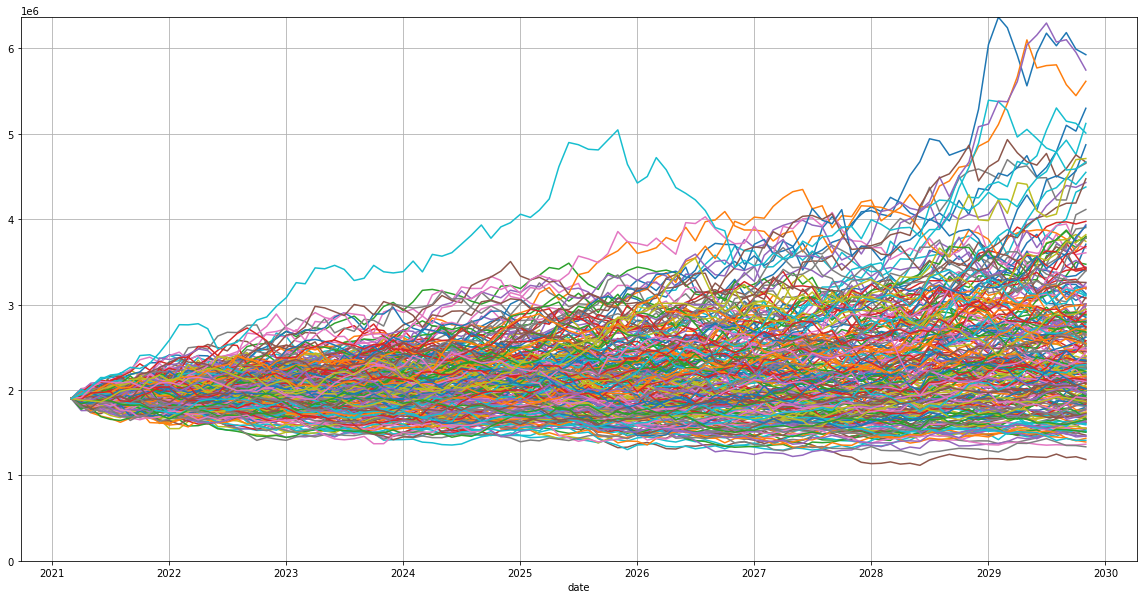

In [128]:
paths = list(df["path"].unique())
fig, ax = plt.subplots()
maxy = df["total"].max()
for path in paths:
  pdf = df.loc[df["path"]==path]
  pdf.plot(x="date", y="total", figsize=[20,10], grid=True, legend=None,
            ax=ax).set_ylim(bottom=0, top=maxy)


<AxesSubplot:>

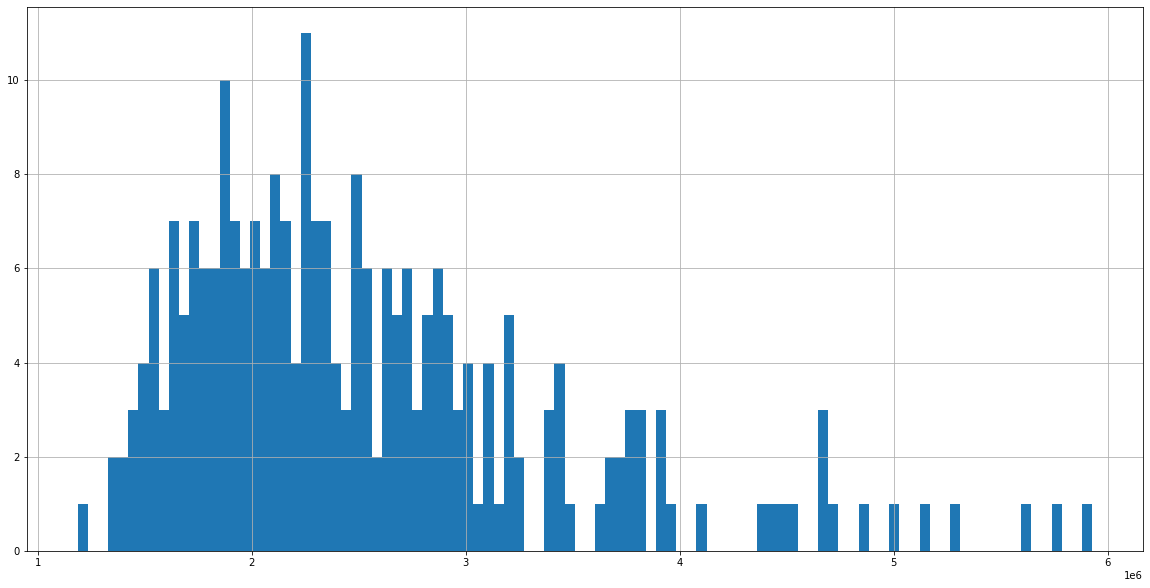

In [36]:
last_date =df["date"].max()
df.loc[df["date"] == last_date, "total"].hist(figsize=[20,10], bins=100)

In [126]:
#df.loc[df["date"] == last_date, ["total"]].plot.density(figsize=[20,10])

In [125]:
import numpy as np
last_date =df["date"].max()

def q10(df):
  return df.quantile(q=.1)
def q25(df):
  return df.quantile(q=.25)
def q50(df):
  return df.quantile(q=.5)
def q75(df):
  return df.quantile(q=.75)
def q90(df):
  return df.quantile(q=.9)


x = df.loc[df["date"] == last_date, ["total"]]

x.agg([q10,  q25, "mean", q50, q75, q90]).transpose()

,min,q10,q25,mean,q50,q75,q90
total,1.186816e+06,1.642092e+06,1.906073e+06,2.540636e+06,2.323324e+06,2.905073e+06,3.778235e+06


In [73]:
import pandas as pd
pd.__version__


'1.1.5'